# Background Analysis


## Setup

In [1]:
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# Show matplotlib plots in this notebook
%matplotlib inline
# Setting plot parameters
from pylab import rcParams
params = {
    'figure.figsize': (8, 8),
    'legend.fontsize': 15
}
rcParams.update(params)

In [2]:
df = pd.read_csv('../data/results.csv')

In [3]:
parents_edu_order = ['Did not complete high school', 'High school', 'Some postsecondary', 
                          'Postsecondary diploma (e.g. college)', 'Bachelor\'s', 
                          'Master\'s/Professional (MD, MBA, etc)', 'Doctorate']
family_income_order = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '>250k']
rounded_admission_avg_order = [i for i in range(70, 100)]

In [4]:
def bar_chart(col, order=None):
    if order:
        results = df.groupby(col).size().reindex(order)
    else:
        results = df.groupby(col).size().sort_values(ascending=False)
    display(results.to_frame())
    results.plot(kind='bar')
    plt.show()
       
def bar_chart_vs_salary(col, order=None):
    if order:
        results = df[[col, 'coop_salary_avg']].groupby(col).mean().reindex(order)
    else:
        results = df[[col, 'coop_salary_avg']].groupby(col).mean().sort_values('coop_salary_avg', ascending=False)
    display(results)
    results.plot(kind='bar')
    plt.show()
    
def bar_chart_percentile_vs_salary(col, num_percentiles=10):
    percentiles = np.linspace(0, 1, num=num_percentiles + 1)
    
    # drop first percentile because we'll check if less than than that value
    percentile_values = list(df[col].quantile(percentiles))[1:] 
    percentiles = [int(100 * x) for x in percentiles[1:]]
    
    # copy df because we're going to add a temp column
    d = df[[col, 'coop_salary_avg']]
    
    def get_percentile(x):
        for percentile, percentile_value in zip(percentiles, percentile_values):
            if x <= percentile_value:
                return percentile
    
    # create new percentile column
    percentile_col = col + '_percentile'
    df[percentile_col] = df[col].apply(get_percentile)
    
    # generate results
    results = df[[percentile_col, 'coop_salary_avg']].groupby(percentile_col).mean().reindex(percentiles)
    display(results)
    results.plot(kind='bar')
    plt.show()

## Analysis

,0
gender,
Female,8
Male,3
Prefer not to say,1


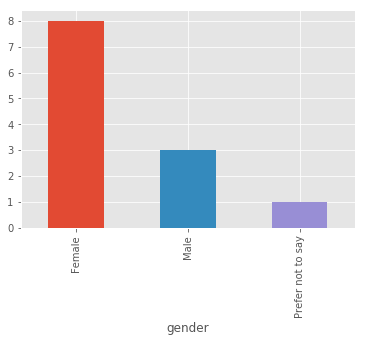

,0
location,
"Montreal, Canada",10
"Markham, Canada",2


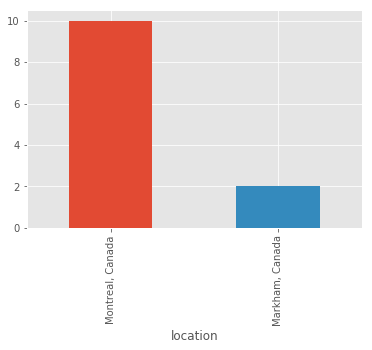

,0
is_international,
Yes,8
No,4


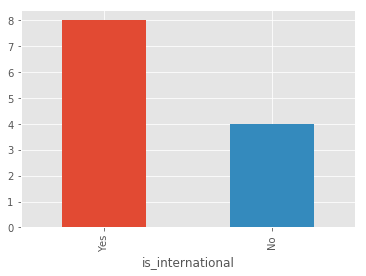

,0
ethnicity,
Chinese,9
English,2
Canadian,1


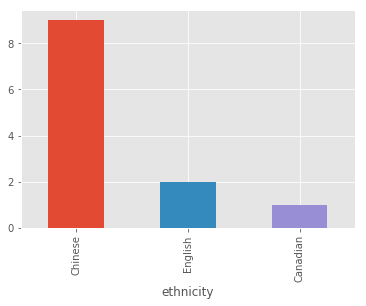

,0
parents_edu,
Did not complete high school,1.0
High school,NaN
Some postsecondary,NaN
Postsecondary diploma (e.g. college),7.0
Bachelor's,2.0
"Master's/Professional (MD, MBA, etc)",2.0
Doctorate,NaN


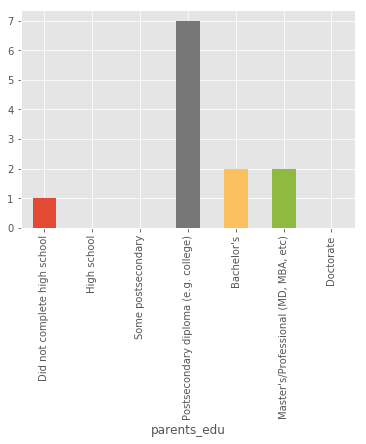

,0
parents_technical,
No,10
Yes,2


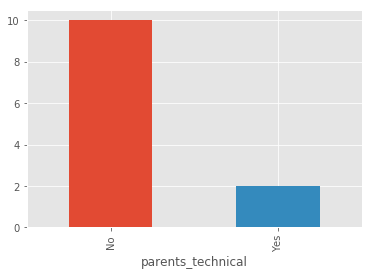

,0
family_income,
0-50k,7.0
50k-100k,NaN
100k-150k,1.0
150k-200k,1.0
200k-250k,NaN
>250k,1.0


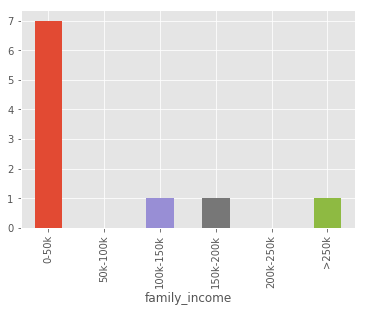

Number of people who weren't sure or prefered not to disclose family income: 2


,0
rounded_admission_avg,
70,1.0
71,NaN
72,NaN
73,NaN
74,NaN
75,1.0
76,NaN
77,NaN
78,NaN


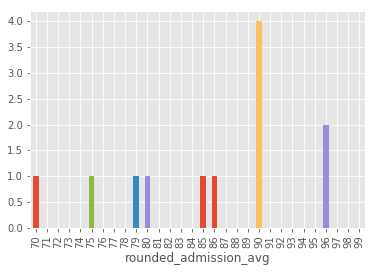

In [5]:
bar_chart('gender')
bar_chart('location')
bar_chart('is_international')
bar_chart('ethnicity')
bar_chart('parents_edu', parents_edu_order)
bar_chart('parents_technical')

bar_chart('family_income', family_income_order)
print 'Number of people who weren\'t sure or prefered not to disclose family income: ' + \
        str(df.loc[df['family_income'] == 'Not sure / prefer not to disclose'].shape[0])
    
bar_chart('rounded_admission_avg', rounded_admission_avg_order)

,coop_salary_avg
gender,
Prefer not to say,8254.166992
Female,8032.812744
Male,7471.388997


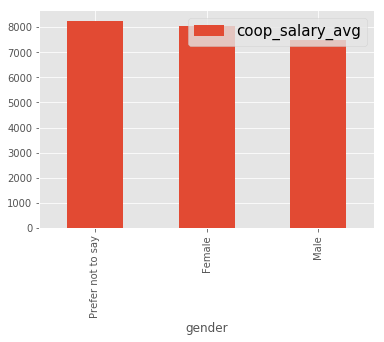

,coop_salary_avg
location,
"Montreal, Canada",8077.083594
"Markham, Canada",7080.000000


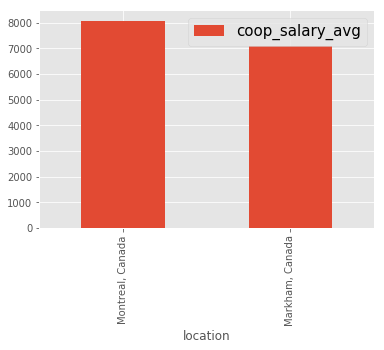

,coop_salary_avg
is_international,
No,7960.625244
Yes,7886.041870


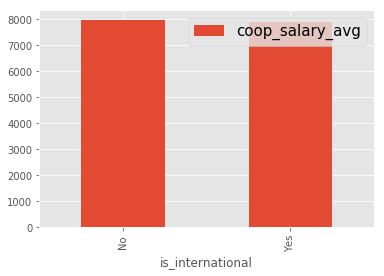

,coop_salary_avg
ethnicity,
Chinese,8057.407661
English,7667.083496
Canadian,7080.000000


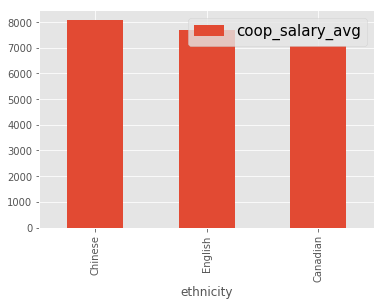

,coop_salary_avg
parents_edu,
Did not complete high school,8254.166992
High school,NaN
Some postsecondary,NaN
Postsecondary diploma (e.g. college),8001.190709
Bachelor's,7080.000000
"Master's/Professional (MD, MBA, etc)",8254.166992
Doctorate,NaN


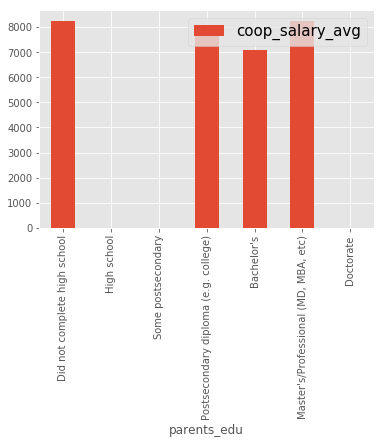

,coop_salary_avg
parents_technical,
No,8077.083594
Yes,7080.000000


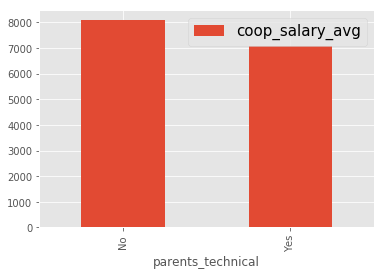

,coop_salary_avg
family_income,
0-50k,8001.190709
50k-100k,NaN
100k-150k,8254.166992
150k-200k,7080.000000
200k-250k,NaN
>250k,8254.166992


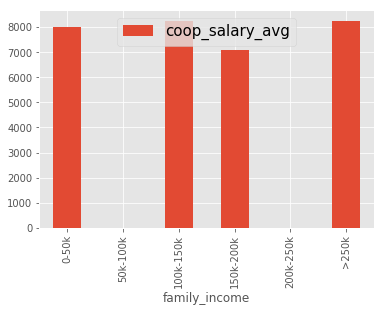

,coop_salary_avg
rounded_admission_avg,
70,6254.166504
71,NaN
72,NaN
73,NaN
74,NaN
75,8254.166992
76,NaN
77,NaN
78,NaN


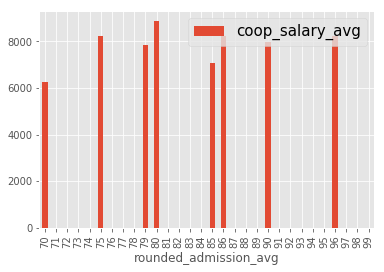

,coop_salary_avg
admission_avg_percentile,
10,7254.166748
20,7858.333496
30,8879.166992
40,7080.000000
50,8254.166992
60,7960.625244
70,NaN
80,NaN
90,NaN


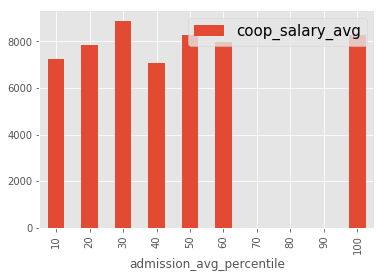

In [6]:
bar_chart_vs_salary('gender')
bar_chart_vs_salary('location')
bar_chart_vs_salary('is_international')
bar_chart_vs_salary('ethnicity')
bar_chart_vs_salary('parents_edu', parents_edu_order)
bar_chart_vs_salary('parents_technical')
bar_chart_vs_salary('family_income', family_income_order)
bar_chart_vs_salary('rounded_admission_avg', rounded_admission_avg_order)
bar_chart_percentile_vs_salary('admission_avg')